In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot

In [2]:
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [4]:
VOCAB_SIZE = 10000
MAX_LEN = 256
EMBEDDING_VECTOR_SIZE = 5

In [5]:
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data,
                                                           maxlen=MAX_LEN,
                                                           padding='post')
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data,
                                                          maxlen=MAX_LEN,
                                                          padding='post')

In [6]:
print(train_labels[0].shape)
print(test_data[0].shape)

()
(256,)


In [7]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(VOCAB_SIZE, 
                            EMBEDDING_VECTOR_SIZE, 
                            input_length=MAX_LEN,
                            name='embedding'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_data,
                    train_labels,
                    epochs=10,
                    validation_data=(test_data, test_labels))

Epoch 1/10
782/782 [==============================] - 4s 4ms/step - loss: 0.5793 - accuracy: 0.6808 - val_loss: 0.3720 - val_accuracy: 0.8503
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2875 - accuracy: 0.8885 - val_loss: 0.2941 - val_accuracy: 0.8789
Epoch 3/10
782/782 [==============================] - 2s 3ms/step - loss: 0.2099 - accuracy: 0.9224 - val_loss: 0.2838 - val_accuracy: 0.8814
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.1677 - accuracy: 0.9433 - val_loss: 0.2919 - val_accuracy: 0.8773
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.1365 - accuracy: 0.9564 - val_loss: 0.3034 - val_accuracy: 0.8758
Epoch 6/10
782/782 [==============================] - 2s 3ms/step - loss: 0.1107 - accuracy: 0.9673 - val_loss: 0.3220 - val_accuracy: 0.8729
Epoch 7/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0883 - accuracy: 0.9766 - val_loss: 0.3444 - val_accuracy: 0.8680
Epoch 

In [26]:
import matplotlib.pyplot as plt
def show_results(history, metric):
  plt.title(f'model {metric}')
  plt.xlabel('Epochs')
  plt.ylabel(f'{metric} vs val_{metric}')
  plt.plot(history.history[metric], c='b', label=metric)
  plt.plot(history.history[f'val_{metric}'], c='g', label=f'val_{metric}')
  plt.legend()

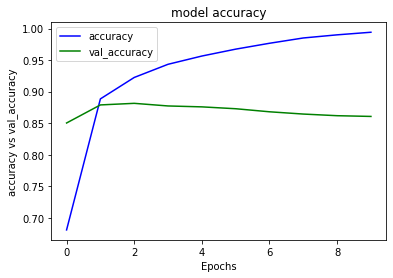

In [27]:
show_results(history=history, metric='accuracy')

In [36]:
weights = model.get_layer('embedding').get_weights()[0]

In [40]:
weights[10]

array([0.04632135, 0.01417478, 0.00378654, 0.04731134, 0.05453973],
      dtype=float32)

In [38]:
weights[1]

array([ 0.08813736,  0.06581154,  0.01816791, -0.03774164, -0.06499389],
      dtype=float32)

In [39]:
len(weights)

10000